# Tiger County and State Boundaries

Tiger County and State Boundaries


In [63]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt


from ambry import get_library
l = get_library()
b = l.bundle('census.gov-tiger-statecounty-2015-0.0.1')
p = b.partition('p04M004001')

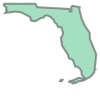

In [67]:
from shapely.wkt import dumps, loads
from descartes import PolygonPatch
geos = [loads(row.geometry).simplify(.05) for row in p ]
len(geos)
geos[9]

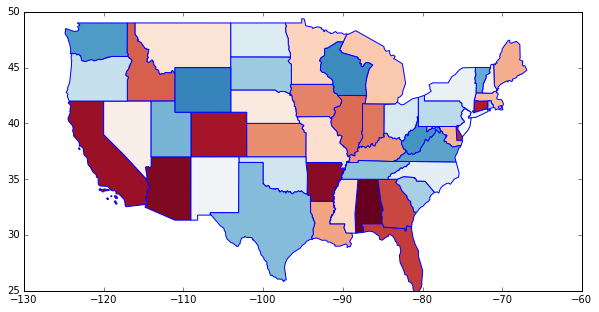

In [68]:

BLUE = '#6699cc'
GRAY = '#999999'
cm = plt.get_cmap('RdBu')

fig = plt.figure(1, figsize=(10,5), dpi=90)
ax = fig.add_subplot(111)
num_colors = 60
for i, g in enumerate(geos):
    color = cm(1. * i / num_colors)
    if g.type == 'Polygon':
        patch = PolygonPatch(g, edgecolor = 'b', facecolor = color)
        ax.add_patch(patch)
    elif g.type == 'MultiPolygon':
        for poly in g.geoms:
            patch = PolygonPatch(poly, edgecolor = 'b', facecolor = color)
            ax.add_patch(patch)
    else:
        continue
        
    
    
plt.ylim([25,50])
plt.xlim([-130,-60])
plt.show()
